In [48]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:

df = pd.read_csv("scraped_data.csv", names=["lot_size", "price", "number_of_properties", "type", "hijri_date", "date", "reference_number", "neighborhood", "city", "state"], header=0)

df["lot_size"] = df["lot_size"].str.replace(",", "").astype(float)
df["price"] = df["price"].str.replace(",", "").astype(float)

df["neighborhood"] = df["neighborhood"].str.split("/").str[1]

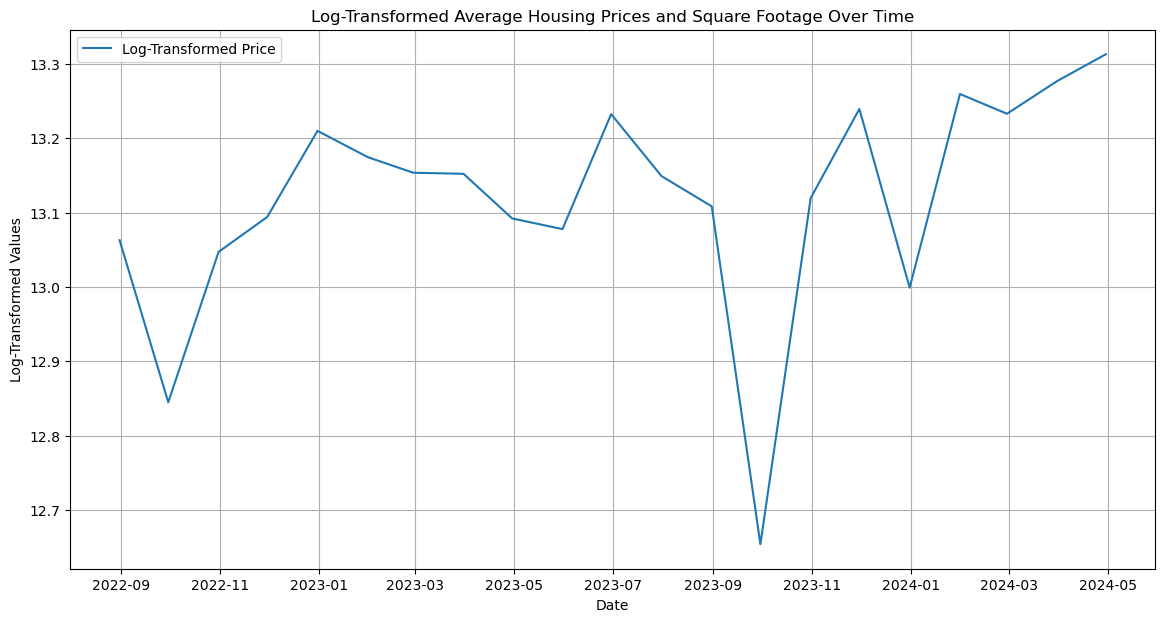

In [51]:
data = pd.DataFrame()

data['log_price'] = np.log1p(df['price'])
data['log_foot_square'] = np.log1p(df['lot_size'])

data['date'] = pd.to_datetime(df['date'])

data.set_index('date', inplace=True)

# Resample the data to get monthly average log prices and log square footage (or weekly, yearly, etc.)
monthly_log_prices = data['log_price'].resample('M').mean()
monthly_log_foot_square = data['log_foot_square'].resample('M').mean()

# Plotting the log-transformed price chart
plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_log_prices.index, y=monthly_log_prices.values, label='Log-Transformed Price')
#sns.lineplot(x=monthly_log_foot_square.index, y=monthly_log_foot_square.values, label='Log-Transformed Square Footage')
plt.title('Log-Transformed Average Housing Prices and Square Footage Over Time')
plt.xlabel('Date')
plt.ylabel('Log-Transformed Values')
plt.grid(True)
plt.legend()
plt.show()